# 

# Query "Light Weight" Networkx Graph Database

In [101]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [102]:
embedding_dictionary = {
    "ref1": {
        "vector": [0.92, 0.75, 0.61],
        "postcode": "ZIP1"
    },
    "ref2": {
        "vector": [0.78, 0.83, 0.55],
        "postcode": "ZIP1"
    },
    "ref3": {
        "vector": [0.64, 0.69, 0.72],
        "postcode": "ZIP1"
    },
    "ref4": {
        "vector": [0.87, 0.79, 0.91],
        "postcode": "ZIP1"
    },
    "ref5": {
        "vector": [0.52, 0.64, 0.58],
        "postcode": "ZIP2"
    },
    "ref6": {
        "vector": [0.95, 0.91, 0.98],
        "postcode": "ZIP2"
    },
    "ref7": {
        "vector": [0.61, 0.55, 0.72],
        "postcode": "ZIP2"
    },
    "ref8": {
        "vector": [0.82, 0.77, 0.88],
        "postcode": "ZIP2"
    },
    "ref9": {
        "vector": [0.73, 0.68, 0.80],
        "postcode": "ZIP3"
    },
    "ref10": {
        "vector": [0.89, 0.84, 0.94],
        "postcode": "ZIP3"
    },
    "ref11": {
        "vector": [0.68, 0.62, 0.75],
        "postcode": "ZIP3"
    },
    "ref12": {
        "vector": [0.75, 0.70, 0.83],
        "postcode": "ZIP3"
    },
    "ref13": {
        "vector": [0.83, 0.78, 0.90],
        "postcode": "ZIP3"
    },
    "ref14": {
        "vector": [0.57, 0.49, 0.63],
        "postcode": "ZIP4"
    },
    "ref15": {
        "vector": [0.91, 0.88, 0.97],
        "postcode": "ZIP4"
    },
    "ref16": {
        "vector": [0.70, 0.65, 0.76],
        "postcode": "ZIP4"
    },
    "ref17": {
        "vector": [0.79, 0.74, 0.85],
        "postcode": "ZIP4"
    },
    "ref18": {
        "vector": [0.60, 0.53, 0.68],
        "postcode": "ZIP4"
    },
    "ref19": {
        "vector": [0.88, 0.82, 0.92],
        "postcode": "ZIP4"
    },
    "ref20": {
        "vector": [0.76, 0.71, 0.81],
        "postcode": "ZIP4"
    }
}

In [96]:
G = nx.Graph()

# add ref as node, vector as attribute
for ref, data in embedding_dictionary.items():
    embedding = data["vector"]
    postcode = data["postcode"]
    G.add_node(ref, embedding=embedding, postcode=postcode)

# Find n most similar tenders

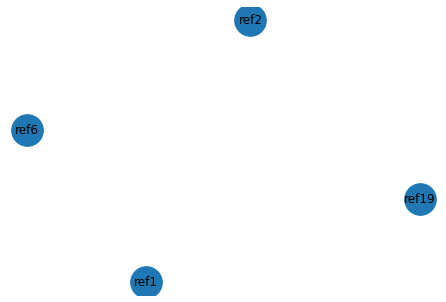

The 3 most similar tenders to ref1 = ['ref2', 'ref6', 'ref19']
None


In [100]:
def most_similar_tenders(G, ref, n, thres, same_post=False):
    similarity_scores = []
    
    vector1 = G.nodes[ref]["embedding"]
    post1 = G.nodes[ref]["postcode"]
    
    # cosine between chosen ref and all other refs
    for other_ref in G.nodes():
        if other_ref != ref:
            vector2 = G.nodes[other_ref]["embedding"]
            similarity = cosine(vector1, vector2)
            
            if same_post:
                post2 = G.nodes[other_ref]["postcode"]
                if post1 == post2:
                    similarity_scores.append((other_ref, similarity))

            else:
                similarity_scores.append((other_ref, similarity))

    # desc order
    similarity_scores.sort(key=lambda x: x[1], reverse=True)

    # filter thres
    similar_refs = [other_ref for other_ref, similarity in similarity_scores if similarity >= thres]
    most_similar_n = similar_refs[:n]
    
    show_similar_tenders(G, ref, most_similar_n)
    
    return print(f"The {n} most similar tenders to {ref} = {most_similar_n[:n]}")

def cosine(vector1, vector2):
    similarity = cosine_similarity([vector1], [vector2])[0][0]
    return similarity

def show_similar_tenders(G, ref, similar_refs):
    nodes = similar_refs + [ref]
    subgraph = G.subgraph(nodes)
    pos = nx.spring_layout(subgraph)
    
    nx.draw(subgraph, pos, with_labels=True, node_size=1000)
    plt.show()

ref = "ref1"
n = 3
thres = 0.9
similar_refs = most_similar_tenders(G, ref, n, thres)
print(similar_refs)